In [3]:
import pandas as pd
df = pd.read_csv("bank-additional-full.csv", sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
# unknown values
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols: 
    print(f"{col}--> 'unknown' count: {df[col].value_counts().get('unknown', 0)}")


job--> 'unknown' count: 330
marital--> 'unknown' count: 80
education--> 'unknown' count: 1731
default--> 'unknown' count: 8597
housing--> 'unknown' count: 990
loan--> 'unknown' count: 990
contact--> 'unknown' count: 0
month--> 'unknown' count: 0
day_of_week--> 'unknown' count: 0
poutcome--> 'unknown' count: 0


In [27]:
df['default'].value_counts()


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [43]:
# inbalanced column, not optimal to keep. 
df.drop(columns='default', inplace=True)

In [29]:
df["job"].value_counts()


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [31]:
df["housing"].value_counts()


housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [33]:
df["loan"].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [35]:
df["education"].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [37]:
df["marital"].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [49]:
# replacing unknown with mode of the column
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])


# unknown values
categorical_cols = ['job', 'marital', 'education','housing', 'loan']
for col in categorical_cols:
    print(f"{col}--> 'unknown' count: {df[col].value_counts().get('unknown', 0)}")

job--> 'unknown' count: 0
marital--> 'unknown' count: 0
education--> 'unknown' count: 0
housing--> 'unknown' count: 0
loan--> 'unknown' count: 0


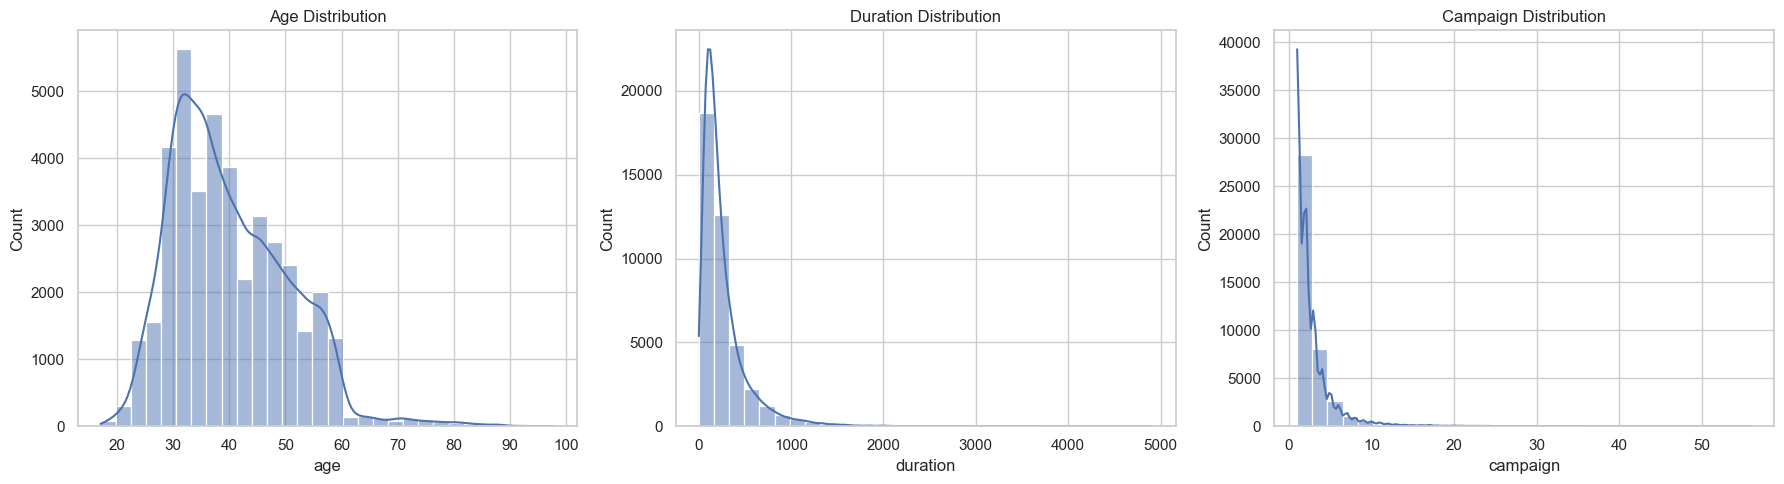

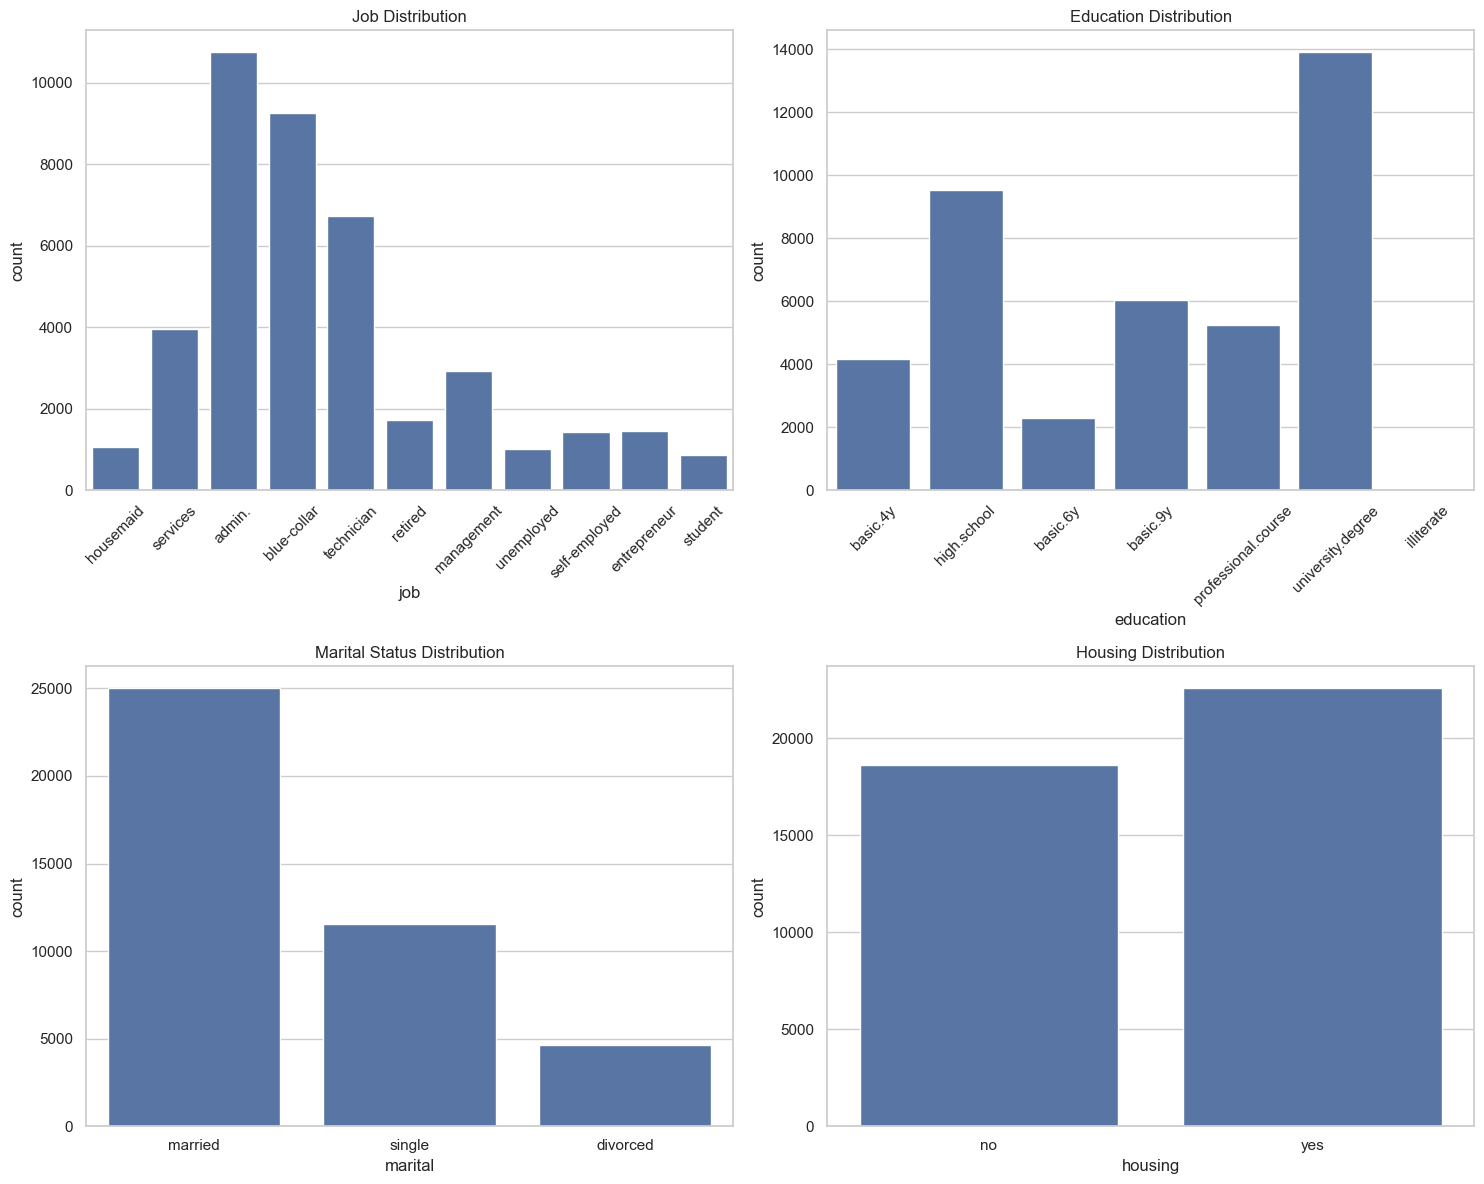

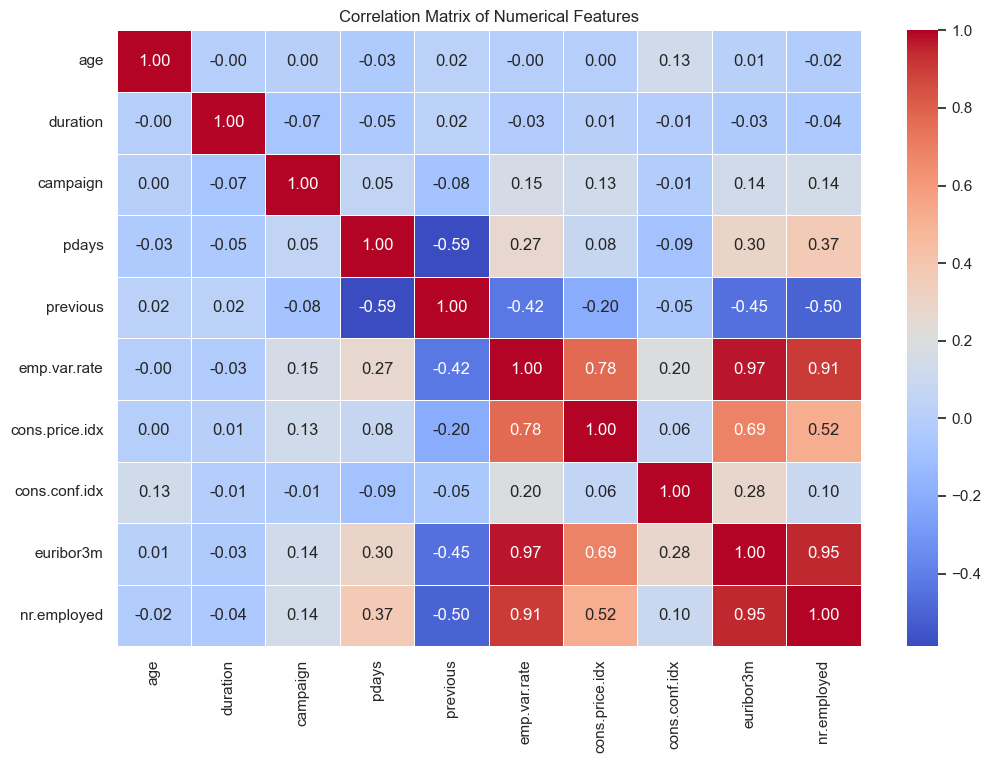

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Numerical Features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Age Distribution
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot Duration Distribution
sns.histplot(df['duration'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Duration Distribution')

# Plot Campaign Distribution
sns.histplot(df['campaign'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Campaign Distribution')

plt.tight_layout()
plt.show()

# 2. Categorical Feature Counts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Job Distribution
sns.countplot(data=df, x='job', ax=axes[0, 0])
axes[0, 0].set_title('Job Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Education Distribution
sns.countplot(data=df, x='education', ax=axes[0, 1])
axes[0, 1].set_title('Education Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Marital Status Distribution
sns.countplot(data=df, x='marital', ax=axes[1, 0])
axes[1, 0].set_title('Marital Status Distribution')

# Housing Distribution
sns.countplot(data=df, x='housing', ax=axes[1, 1])
axes[1, 1].set_title('Housing Distribution')

plt.tight_layout()
plt.show()

# 3. Correlation Matrix (for numerical features)
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
corr = numerical_df.corr()  # Calculate correlation on numerical data

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [78]:
# target value with yes and no to numerical value "1" or "0" for binary columns.
from sklearn.preprocessing import LabelEncoder # to possible use random forest

label_encoder = LabelEncoder()

df["y"] = label_encoder.fit_transform(df["y"]) # yes or no
df["housing"] = label_encoder.fit_transform(df["housing"]) # yes or no
df["loan"] = label_encoder.fit_transform(df["loan"]) # yes or no

df.head()


,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,martial
0,56,housemaid,basic.4y,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,married
1,57,services,high.school,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,married
2,37,services,high.school,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,married
3,40,admin.,basic.6y,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,married
4,56,services,high.school,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,married


In [86]:
# Applying one-hot encoding to categorical columns with more than two distinct values
job = pd.get_dummies(df['job'], prefix='job')
marital = pd.get_dummies(df['marital'], prefix='marital')
education = pd.get_dummies(df['education'], prefix='education')
contact = pd.get_dummies(df['contact'], prefix='contact')
month = pd.get_dummies(df['month'], prefix='month')
day_of_week = pd.get_dummies(df['day_of_week'], prefix='day_of_week')
poutcome = pd.get_dummies(df['poutcome'], prefix='poutcome')

#Dropping the original categorical columns and add the one-hot encoded columns
df = df.drop(['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1)

# Encoded columns back to the DataFrame
df = pd.concat([df, job, marital, education, contact, month, day_of_week, poutcome], axis=1)


print(df.head())

   age  housing  loan  duration  campaign  pdays  previous  emp.var.rate  \
0   56        0     0       261         1    999         0           1.1   
1   57        0     0       149         1    999         0           1.1   
2   37        1     0       226         1    999         0           1.1   
3   40        0     0       151         1    999         0           1.1   
4   56        0     1       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  ...  month_oct  month_sep  day_of_week_fri  \
0          93.994          -36.4  ...      False      False            False   
1          93.994          -36.4  ...      False      False            False   
2          93.994          -36.4  ...      False      False            False   
3          93.994          -36.4  ...      False      False            False   
4          93.994          -36.4  ...      False      False            False   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_w

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   housing                        41188 non-null  int64  
 2   loan                           41188 non-null  int64  
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   emp.var.rate                   41188 non-null  float64
 8   cons.price.idx                 41188 non-null  float64
 9   cons.conf.idx                  41188 non-null  float64
 10  euribor3m                      41188 non-null  float64
 11  nr.employed                    41188 non-null  float64
 12  y                              41188 non-null 